# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the dataset from the local drive

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Read the datset in csv format with pandas

In [3]:
phyto = pd.read_csv('gdrive/My Drive/Phytoplankton.csv')
phyto.shape

(882, 16)

# Create a new header for the dataset by specify the column to use as header

In [4]:
new_header = phyto.iloc[0] #grab the first row for the header
phyto = phyto[1:] #take the data less the header row
phyto.columns = new_header #set the header row as the df header
phyto = phyto[:828]

In [8]:
phyto.head(3)

,Sample number,Production area,Bed ID,Local authority,Grid reference\r\n\r\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \r\ncells L-1\r\n(PSP),Dinophysiaceae \r\ncells L-1\r\n(DSP),Prorocentrum lima \r\ncells L-1\r\n(DSP),Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP),Ligulodinium polyedrum \r\ncells L-1\r\n(Yessotoxin),Protoceratium reticulatum \r\ncells L-1\r\n(Yessotoxin),Prorocentrum cordatum \r\ncells L-1\r\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,ND,ND,ND,ND,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,44201.4375,ND,ND,ND,400,ND,ND,ND,NaN,NaN


In [9]:
phyto.columns

Index([                                           'Sample number',
                                                'Production area',
                                                         'Bed ID',
                                                'Local authority',
                      'Grid reference\r\n\r\nNote 1             ',
                                                 'Sampling point',
                                          'Date sample collected',
                        'Alexandrium spp. \r\ncells L-1\r\n(PSP)',
                          'Dinophysiaceae \r\ncells L-1\r\n(DSP)',
                       'Prorocentrum lima \r\ncells L-1\r\n(DSP)',
                  'Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ',
           'Ligulodinium polyedrum \r\ncells L-1\r\n(Yessotoxin)',
       'Protoceratium reticulatum \r\ncells L-1\r\n(Yessotoxin) ',
            'Prorocentrum cordatum \r\ncells L-1\r\n(Venerupin) ',
                                                              

# Data cleaning

### Four independent features are selected for cleaning. Missing and not detected values were replaced, and the errors were cast

In [12]:
def clean_data(phyto):
 phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'] = phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'].replace('ND', 
                                                                                                             0)
 phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '] = phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '].replace('ND',
                                                                                                                     0)
 phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'] = phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'].replace('ND', 
                                                                                                         0)
 phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'] = phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'].replace('ND', 
                                                                                                               0)

 phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'] = pd.to_numeric(phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'], 
                                                                  errors='coerce')
 phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '] = pd.to_numeric(phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '], 
                                                                        errors='coerce')
 phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'] = pd.to_numeric(phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'], 
                                                                errors='coerce')
 phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'] = pd.to_numeric(phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'], 
                                                                   errors='coerce')
    
 phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'] = phyto['Alexandrium spp. \r\ncells L-1\r\n(PSP)'].fillna(-1)
 phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '] = phyto['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) '].fillna(-1)
 phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'] = phyto['Dinophysiaceae \r\ncells L-1\r\n(DSP)'].fillna(-1)
 phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'] = phyto['Prorocentrum lima \r\ncells L-1\r\n(DSP)'].fillna(-1)
    

clean_data(phyto)
phyto.head(3)


,Sample number,Production area,Bed ID,Local authority,Grid reference\r\n\r\nNote 1,Sampling point,Date sample collected,Alexandrium spp. \r\ncells L-1\r\n(PSP),Dinophysiaceae \r\ncells L-1\r\n(DSP),Prorocentrum lima \r\ncells L-1\r\n(DSP),Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP),Ligulodinium polyedrum \r\ncells L-1\r\n(Yessotoxin),Protoceratium reticulatum \r\ncells L-1\r\n(Yessotoxin),Prorocentrum cordatum \r\ncells L-1\r\n(Venerupin),NaN,NaN
1,1/21,Solent,B24BK,Southampton PHA,SZ57479794,Browndown,44200.4583333333,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
2,2/21,Southampton Water,B21AT,Southampton PHA,SU48760530,Hamble Estuary,44200.3541666667,0.0,0.0,0.0,0.0,ND,ND,ND,NaN,NaN
3,3/21,Brancaster,B05AS,Kings Lynn & W Norfolk BC,TF79884539,Norton Creek Mussels,44201.4375,0.0,0.0,0.0,400.0,ND,ND,ND,NaN,NaN


# Data labelling

### A dictionary was created to map the each column to a threshold. A thresold reach is created for each of the feature and add to the dataframe as the target feature

In [13]:
thresholds = {'Alexandrium spp. \r\ncells L-1\r\n(PSP)' : 40, 
              'Dinophysiaceae \r\ncells L-1\r\n(DSP)' : 100,
              'Prorocentrum lima \r\ncells L-1\r\n(DSP)' : 100, 
              'Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ' : 150000}

In [14]:
def check_thresholds(phyto):
    t = []
    for i,j in enumerate(phyto["Sample number"]):
        alexandrium = phyto.iloc[i]['Alexandrium spp. \r\ncells L-1\r\n(PSP)']
        pseudo_nitzschia = phyto.iloc[i]['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ']
        dinophysiaceae = phyto.iloc[i]['Dinophysiaceae \r\ncells L-1\r\n(DSP)']
        prorocentrum = phyto.iloc[i]['Prorocentrum lima \r\ncells L-1\r\n(DSP)']

        threshold_reached = 0
        if pseudo_nitzschia >= thresholds['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ']:
             threshold_reached = 1
        elif dinophysiaceae >= thresholds['Dinophysiaceae \r\ncells L-1\r\n(DSP)']:
            threshold_reached = 1
        elif prorocentrum >= thresholds['Prorocentrum lima \r\ncells L-1\r\n(DSP)']:
            threshold_reached = 1
        elif alexandrium >= thresholds['Alexandrium spp. \r\ncells L-1\r\n(PSP)']:
            threshold_reached = 1

        t.append(threshold_reached)

    return t



thresholds_reached = check_thresholds(phyto)
phyto['thresholds_reached'] = thresholds_reached
pd.DataFrame.to_csv(phyto, 'thresholds_cleaned.csv', sep=',', index=False)

## The dataset is divided into dependent (y) and independent (x) variables

In [15]:
x = pd.read_csv('thresholds_cleaned.csv', usecols=['Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP) ',
                                                   'Dinophysiaceae \r\ncells L-1\r\n(DSP)', 
                                                   'Prorocentrum lima \r\ncells L-1\r\n(DSP)', 
                                                   'Alexandrium spp. \r\ncells L-1\r\n(PSP)'], 
                na_values = ['no info', '.'])

y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

## The independent (x) and dependent (y) variables are split into training and test data

## Feature scaling was done to standardized the data

In [16]:
## Splitting the dataset into the Training and Test test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

## Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modelling

### import necessay library
### Define the model

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils

In [18]:
# Modelling
model = Sequential()
model.add(Dense(units = 500, activation = 'relu', input_shape = (4,)))
model.add(Dropout(0.4))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2500      
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                25050     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 27,601
Trainable params: 27,601
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(
    x_train, y_train, 
    batch_size = 32, 
    epochs = 20, 
    verbose = 1, 
    validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
21/21 [==============================] - 3s 12ms/step - loss: 1.7943 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 3/20
21/21 [==============================] - 0s 5ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 4/20
21/21 [==============================] - 0s 5ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 5/20
21/21 [==============================] - 0s 4ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 6/20
21/21 [==============================] - 0s 5ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 7/20
21/21 [==============================] - 0s 5ms/step - loss: 1.7941 - accuracy: 0.8837 - val_loss: 1.6726 - val_accuracy: 0.8916
Epoch 8/20
21/21 [=

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

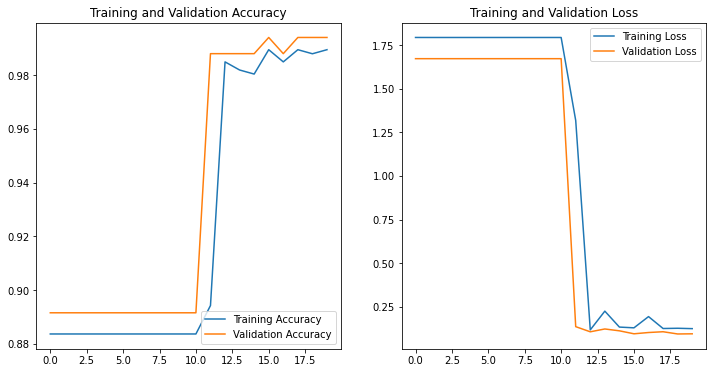

In [23]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()


### Augmentation of Data size

In [24]:
model_pred = model.predict(
    x_test, batch_size=None, 
    verbose=0, steps=None, 
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False)

model_pred

array([[ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [21.143618 ],
       [ 0.       ],
       [ 2.258242 ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 1.4437473],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 0.       ],
       [ 3.51

In [25]:
predictions = np.zeros(len(x_test))     # Assuming no threshold reached
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
print("Before OverSampling, counts of label '1': {}".format(sum(y["thresholds_reached"] == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y["thresholds_reached"] == 0)))

Before OverSampling, counts of label '1': 95
Before OverSampling, counts of label '0': 733 



In [27]:
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn
from imblearn.over_sampling import SMOTE

In [28]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x, y["thresholds_reached"].ravel())


In [29]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 

After OverSampling, the shape of train_X: (1466, 4)
After OverSampling, the shape of train_y: (1466,) 



In [30]:
history = model.fit(
    x_train_res, 
    y_train_res, 
    batch_size = 32, 
    epochs = 20, 
    verbose = 1, 
    validation_data = (x_test, y_test))

score_res = model.evaluate(
    x_test, 
    y_test, 
    verbose=0)

print('Test loss:', score_res[0])
print('Test accuracy:', score_res[1])

Epoch 1/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9319 - accuracy: 0.7422 - val_loss: 0.1041 - val_accuracy: 0.9940
Epoch 2/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 3/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 4/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 5/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 6/20
46/46 [==============================] - 0s 3ms/step - loss: 3.9529 - accuracy: 0.7408 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 7/20
46/46 [==============================] - 0s 4ms/step - loss: 3.9423 - accuracy: 0.7415 - val_loss: 0.1042 - val_accuracy: 0.9940
Epoch 8/20
46/46 [==

In [31]:
acc_res = history.history['accuracy']
val_acc_res = history.history['val_accuracy']

loss_res = history.history['loss']
val_loss_res = history.history['val_loss']

epochs_range = range(20)

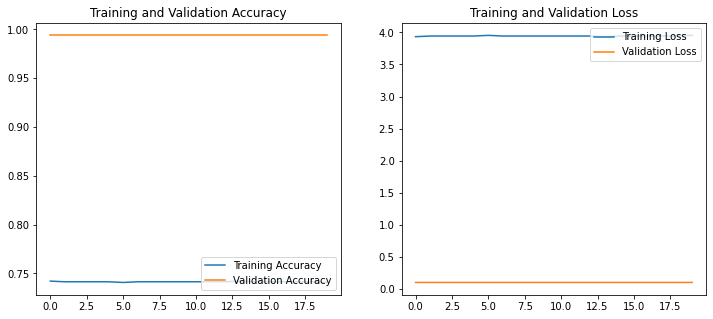

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_res, label='Training Accuracy')
plt.plot(epochs_range, val_acc_res, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_res, label='Training Loss')
plt.plot(epochs_range, val_loss_res, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Data Visualisation

0                                              Alexandrium spp. \r\ncells L-1\r\n(PSP)  \
0                                                                                        
Alexandrium spp. \r\ncells L-1\r\n(PSP)                                       1.000000   
Dinophysiaceae \r\ncells L-1\r\n(DSP)                                         0.055174   
Prorocentrum lima \r\ncells L-1\r\n(DSP)                                     -0.008287   
Pseudo-nitzschia spp. \r\ncells L-1\r\n(ASP)                                  0.019008   
NaN                                                                                NaN   
NaN                                                                                NaN   
thresholds_reached                                                            0.455902   

0                                              Dinophysiaceae \r\ncells L-1\r\n(DSP)  \
0                                                                                      
Alexandrium s

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


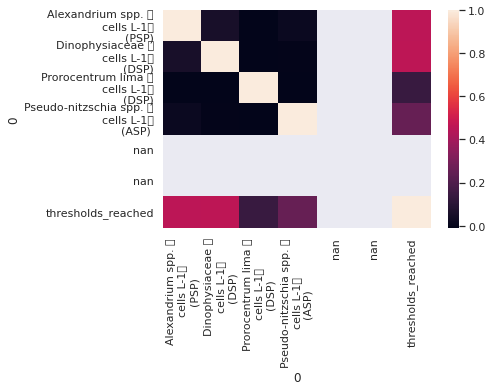

In [34]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
corrMatrix = phyto.corr()
print (corrMatrix)
ax = sns.heatmap(corrMatrix)